learning source: https://www.geeksforgeeks.org/data-visualization/waterfall-charts-in-python/#components-of-a-waterfall-chart

# Objective: understand components of a waterfall chart and learn how to make one

A waterfall chart is basically a graph that represents the cumulative effect of positive or negative values that are sequentially introduced on an initial starting value. Every data point in the series is denoted or represented by a vertical bar. These bars are colour-coded in different colours, usually green, blue, and red. These colours on the bars indicate whether they represent increases or decreases. In this section, you will explore about different components involved in a waterfall chart.

Colour Coding: Typically, Negative values are represented by Red colour, and Positive values are represented by the Green color.

Initial Value: It is the starting point of the waterfall chart.

Intermediate Values: These can be either negative or positive, that are representing decreases or increases respectfully.

Final Value: It is the ending point after accounting for all intermediate points.


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.graph_objects as go

In [3]:
# sample data
sample_data = {
    'Category': ['Start', 'Sales', 'Returns', 'Marketing', 'R&D', 'End'],
    'Amount': [1000, 300, -50, -200, -100, 950]
}
df = pd.DataFrame(sample_data)

In [4]:
df

,Category,Amount
0,Start,1000
1,Sales,300
2,Returns,-50
3,Marketing,-200
4,R&D,-100
5,End,950


In [5]:
# Calculating the running totals
df['Running_Total'] = df['Amount'].cumsum()
df['Shifted_Total'] = df['Running_Total'].shift(1).fillna(0)
df['Position'] = df.apply(lambda row: row['Shifted_Total'] if row['Amount'] >= 0 else row['Running_Total'], axis=1)

In [6]:
df

,Category,Amount,Running_Total,Shifted_Total,Position
0,Start,1000,1000,0.0,0.0
1,Sales,300,1300,1000.0,1000.0
2,Returns,-50,1250,1300.0,1250.0
3,Marketing,-200,1050,1250.0,1050.0
4,R&D,-100,950,1050.0,950.0
5,End,950,1900,950.0,950.0


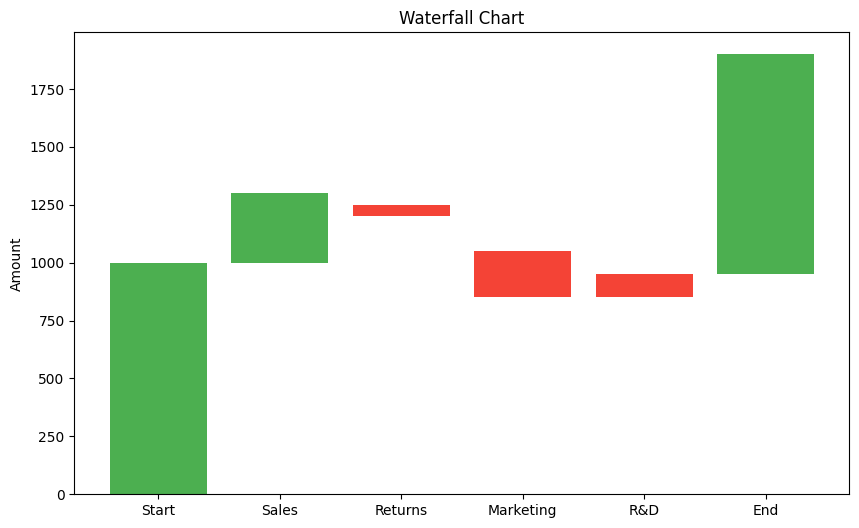

In [ ]:
# plotting the waterfall chart
fig, ax = plt.subplots(figsize=(10, 6))

# code for Bars
ax.bar(df['Category'], df['Amount'], bottom=df['Position'], color=['#4CAF50' if x >= 0 else '#F44336' for x in df['Amount']])

# code for lines to connect the bars
# for i in range(1, len(df)):
#     ax.plot([i-1, i], [df['Running_Total'][i-1], df['Running_Total'][i]], color='black')

# Adding the total labels
for i, (total, amount) in enumerate(zip(df['Running_Total'], df['Amount'])):
    ax.text(i, total + (amount / 2), f'{total:.0f}', ha='center', va='bottom' if amount > 0 else 'top')

ax.set_title('Waterfall Chart')
ax.set_ylabel('Amount')
plt.show()

In [12]:
fig = go.Figure(go.Waterfall(
    name="20",
    orientation="v",
    measure=["relative", "relative", "total", "relative", "relative", "total"],
    x=df['Category'],
    y=df['Amount'],
    textposition="outside",
    text=["+60", "+80", "", "-40", "-20", "Total"],
    connector={"line":{"color":"rgb(63, 63, 63)"}}
))

fig.update_layout(title="Profit and Loss Statement 2018", showlegend=True)
fig.show()

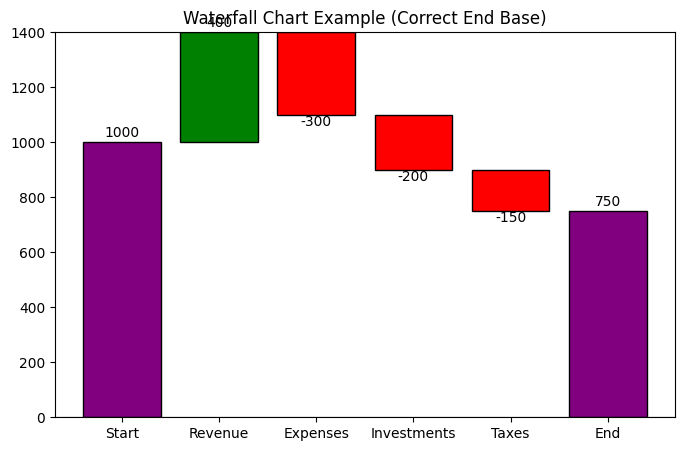

In [16]:
# Example data
categories = ["Start", "Revenue", "Expenses", "Investments", "Taxes", "End"]
values = [1000, 400, -300, -200, -150, 750]  

# Compute cumulative sums
cumulative = np.cumsum(values)
cumulative_shifted = np.insert(cumulative[:-1], 0, 0)  

# Colors
colors = ["purple"] + ["green" if v >= 0 else "red" for v in values[1:-1]] + ["purple"]

fig, ax = plt.subplots(figsize=(8, 5))

for i, (cat, val, bottom, color) in enumerate(zip(categories, values, cumulative_shifted, colors)):
    if i == 0 or i == len(values) - 1:  
        # First and last bar should start from baseline
        ax.bar(cat, val, color=color, edgecolor="black")
        ax.text(i, val + (20 if val >= 0 else -40), str(val), ha="center")
    else:  
        # Middle bars are stacked
        ax.bar(cat, val, bottom=bottom, color=color, edgecolor="black")
        ax.text(i, bottom + val + (20 if val >= 0 else -40), str(val), ha="center")

# Add baseline
ax.axhline(0, color="black", linewidth=0.8)
ax.set_title("Waterfall Chart Example (Correct End Base)")
plt.show()


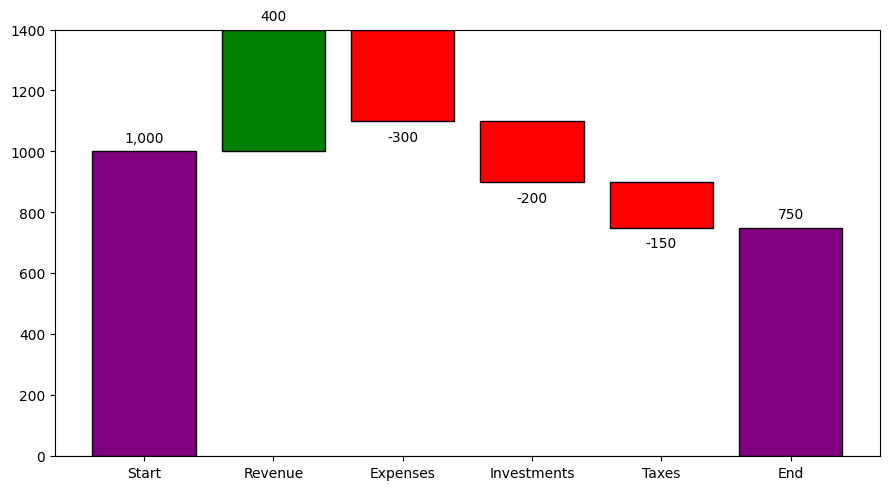

In [17]:
start = 1000
steps = {"Revenue": 400, "Expenses": -300, "Investments": -200, "Taxes": -150}
end = start + sum(steps.values())

cats   = ["Start"] + list(steps) + ["End"]
vals   = [start] + list(steps.values()) + [end]

cum    = np.cumsum(vals)                         # balance after each bar
bottom = np.insert(cum[:-1], 0, 0)               # start level for each bar
is_total = np.zeros(len(vals), bool); is_total[[0,-1]] = True
bottom[is_total] = 0                              # Start/End from baseline

colors = ["purple" if t else ("green" if v >= 0 else "red") 
          for t, v in zip(is_total, vals)]

fig, ax = plt.subplots(figsize=(9,5))
ax.bar(cats, vals, bottom=bottom, color=colors, edgecolor="black")
ax.axhline(0, color="black", lw=0.8)
for i, (v, b, t) in enumerate(zip(vals, bottom, is_total)):
    top = v if t else b+v
    ax.text(i, top + (20 if v >= 0 else -30), f"{v:,.0f}",
            ha="center", va="bottom" if v>=0 else "top")
plt.tight_layout(); plt.show()

In [20]:
vals

[1000, 400, -300, -200, -150, 750]

In [21]:
cum

array([1000, 1400, 1100,  900,  750, 1500])

In [22]:
bottom

array([   0, 1000, 1400, 1100,  900,    0])

In [23]:
is_total 

array([ True, False, False, False, False,  True])

In [25]:
for t, v in zip(is_total, vals):
    print(t)
    print(v)

True
1000
False
400
False
-300
False
-200
False
-150
True
750
